In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime


In [4]:
Cab_Data = pd.read_excel("/Users/abhilashmeneni/Desktop/Internship/Cab_Data-1.xlsx")

In [5]:
Cab_Data.head(10)

,Transaction ID,Date of Travel,Time of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011.0,2016-01-08 00:00:00,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290.0,Card,Male,28.0,10813.0
1,10000012.0,2016-01-09 00:00:00,2016-01-08 01:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703.0,Card,Male,27.0,9237.0
2,10000013.0,2016-01-10 00:00:00,2016-01-08 02:00:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712.0,Cash,Male,53.0,11242.0
3,10000014.0,2016-01-11 00:00:00,2016-01-08 03:00:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020.0,Cash,Male,23.0,23327.0
4,10000015.0,2016-01-12 00:00:00,2016-01-08 04:00:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182.0,Card,Male,33.0,8536.0
5,10000016.0,2016-01-13 00:00:00,2016-01-08 05:00:00,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318.0,Cash,Male,25.0,13984.0
6,10000017.0,2016-01-14 00:00:00,2016-01-08 06:00:00,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788.0,Card,Male,23.0,23788.0
7,10000018.0,2016-01-15 00:00:00,2016-01-08 07:00:00,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106.0,Card,Male,19.0,19980.0
8,10000019.0,2016-01-16 00:00:00,2016-01-08 08:00:00,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799.0,Cash,Male,33.0,19271.0
9,10000020.0,2016-01-17 00:00:00,2016-01-08 09:00:00,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982.0,Cash,Male,57.0,5068.0


In [6]:
print(Cab_Data.describe())

       Transaction ID   KM Travelled  Price Charged   Cost of Trip  \
count    3.502610e+05  350261.000000  350261.000000  350261.000000   
mean     1.022633e+07      22.567607     422.192029     286.164514   
std      1.236082e+05      12.231983     273.135960     157.960802   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011874e+07      12.000000     206.080000     151.200000   
50%      1.022680e+07      22.440000     385.560000     282.384000   
75%      1.033371e+07      32.960000     582.020000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age  Income (USD/Month)  
count  350261.000000  350261.000000       350261.000000  
mean    19140.024316      35.332349        15047.823849  
std     20985.867849      12.594993         7968.015839  
min         1.000000      18.000000         2000.000000  
25%      2693.000000      25.000000         8428.000000  
50%      7448.000000 

In [7]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      350261 non-null  float64       
 1   Date of Travel      350261 non-null  object        
 2   Time of Travel      350261 non-null  datetime64[ns]
 3   Company             350261 non-null  object        
 4   City                350261 non-null  object        
 5   KM Travelled        350261 non-null  float64       
 6   Price Charged       350261 non-null  float64       
 7   Cost of Trip        350261 non-null  float64       
 8   Customer ID         350261 non-null  float64       
 9   Payment_Mode        350261 non-null  object        
 10  Gender              350261 non-null  object        
 11  Age                 350261 non-null  float64       
 12  Income (USD/Month)  350261 non-null  float64       
dtypes: datetime64[ns](1), float64

In [8]:
# Feature analysis

In [9]:
Cab_Data['year'] = Cab_Data['Time of Travel'].dt.year

In [10]:
Cab_Data['Month'] = Cab_Data['Time of Travel'].dt.month

In [11]:
Cab_Data['Profit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']
Cab_Data['Profit_Rate'] = ((Cab_Data['Price Charged'] - Cab_Data['Cost of Trip'])/Cab_Data['Cost of Trip'])*100
Cab_Data['Profit_per_KM'] = Cab_Data['Profit']/ Cab_Data['KM Travelled']


In [12]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      350261 non-null  float64       
 1   Date of Travel      350261 non-null  object        
 2   Time of Travel      350261 non-null  datetime64[ns]
 3   Company             350261 non-null  object        
 4   City                350261 non-null  object        
 5   KM Travelled        350261 non-null  float64       
 6   Price Charged       350261 non-null  float64       
 7   Cost of Trip        350261 non-null  float64       
 8   Customer ID         350261 non-null  float64       
 9   Payment_Mode        350261 non-null  object        
 10  Gender              350261 non-null  object        
 11  Age                 350261 non-null  float64       
 12  Income (USD/Month)  350261 non-null  float64       
 13  year                350261 no

In [13]:
#Compare Yellow Cab and Pink Cab


<AxesSubplot:xlabel='Profit_per_KM', ylabel='Count'>

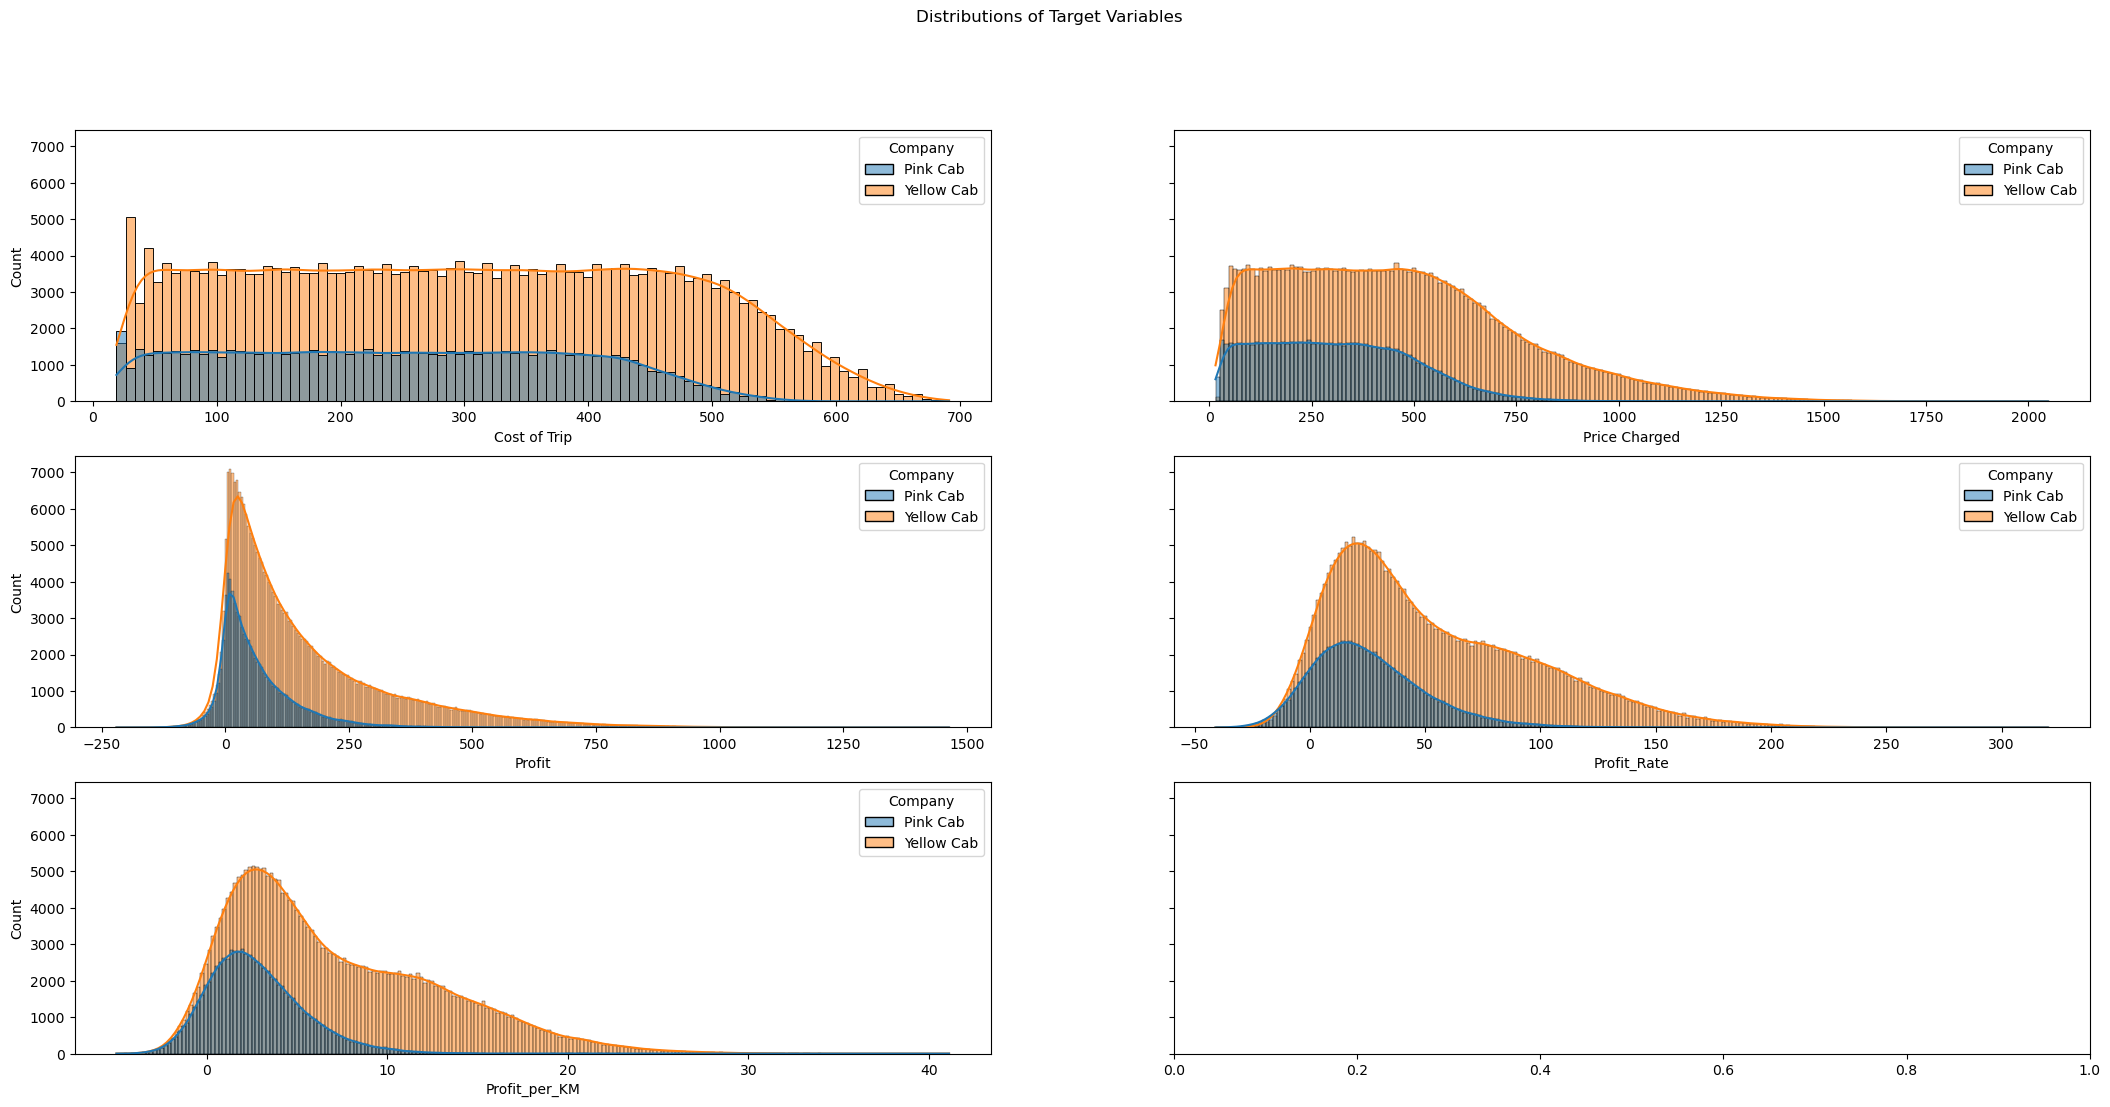

In [14]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=Cab_Data  , x='Cost of Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=Cab_Data  , x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=Cab_Data  , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=Cab_Data  , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=Cab_Data  , x='Profit_per_KM' , kde = True , hue="Company")

In [15]:
Cab_Data['Cost_of_Trip'] = Cab_Data['Cost of Trip']



In [16]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      350261 non-null  float64       
 1   Date of Travel      350261 non-null  object        
 2   Time of Travel      350261 non-null  datetime64[ns]
 3   Company             350261 non-null  object        
 4   City                350261 non-null  object        
 5   KM Travelled        350261 non-null  float64       
 6   Price Charged       350261 non-null  float64       
 7   Cost of Trip        350261 non-null  float64       
 8   Customer ID         350261 non-null  float64       
 9   Payment_Mode        350261 non-null  object        
 10  Gender              350261 non-null  object        
 11  Age                 350261 non-null  float64       
 12  Income (USD/Month)  350261 non-null  float64       
 13  year                350261 no

In [17]:
Cab_Data.head()

,Transaction ID,Date of Travel,Time of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),year,Month,Profit,Profit_Rate,Profit_per_KM,Cost_of_Trip
0,10000011.0,2016-01-08 00:00:00,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290.0,Card,Male,28.0,10813.0,2016.0,1.0,57.315,18.274427,1.882266,313.635
1,10000012.0,2016-01-09 00:00:00,2016-01-08 01:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703.0,Card,Male,27.0,9237.0,2016.0,1.0,23.666,7.067558,0.826904,334.854
2,10000013.0,2016-01-10 00:00:00,2016-01-08 02:00:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712.0,Cash,Male,53.0,11242.0,2016.0,1.0,27.568,28.236644,3.049558,97.632
3,10000014.0,2016-01-11 00:00:00,2016-01-08 03:00:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020.0,Cash,Male,23.0,23327.0,2016.0,1.0,25.798,7.337273,0.777751,351.602
4,10000015.0,2016-01-12 00:00:00,2016-01-08 04:00:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182.0,Card,Male,33.0,8536.0,2016.0,1.0,16.844,17.227131,1.929439,97.776


In [18]:
import math

year = float('NaN')  # example non-finite value

if math.isfinite(year):
    year = int(year)
else:
    # handle the non-finite value here
    print('Non-finite value encountered: ', year)


Non-finite value encountered:  nan


In [19]:
import math

year = float('NaN')  # example NaN value

if math.isnan(year):
    # handle the NaN value here
    print('NaN value encountered: ', year)
else:
    year = int(year)


NaN value encountered:  nan


In [20]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      350261 non-null  float64       
 1   Date of Travel      350261 non-null  object        
 2   Time of Travel      350261 non-null  datetime64[ns]
 3   Company             350261 non-null  object        
 4   City                350261 non-null  object        
 5   KM Travelled        350261 non-null  float64       
 6   Price Charged       350261 non-null  float64       
 7   Cost of Trip        350261 non-null  float64       
 8   Customer ID         350261 non-null  float64       
 9   Payment_Mode        350261 non-null  object        
 10  Gender              350261 non-null  object        
 11  Age                 350261 non-null  float64       
 12  Income (USD/Month)  350261 non-null  float64       
 13  year                350261 no

In [21]:
Cab_Data.year.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Name: year, Length: 359392, dtype: bool

In [22]:
print(Cab_Data[Cab_Data['year'].isnull()])

       Transaction ID Date of Travel Time of Travel Company City  \
1089              NaN            NaN            NaT     NaN  NaN   
1090              NaN            NaN            NaT     NaN  NaN   
1091              NaN            NaN            NaT     NaN  NaN   
1092              NaN            NaN            NaT     NaN  NaN   
1093              NaN            NaN            NaT     NaN  NaN   
...               ...            ...            ...     ...  ...   
10215             NaN            NaN            NaT     NaN  NaN   
10216             NaN            NaN            NaT     NaN  NaN   
10217             NaN            NaN            NaT     NaN  NaN   
10218             NaN            NaN            NaT     NaN  NaN   
10219             NaN            NaN            NaT     NaN  NaN   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
1089            NaN            NaN           NaN          NaN          NaN   
1090            NaN        

In [23]:
Cab_Data['year'] = pd.to_numeric(Cab_Data['year'], errors='coerce')

In [24]:
Cab_Data = Cab_Data.dropna(subset=['year'])

In [25]:
Cab_Data['year'] = Cab_Data['year'].astype(int)

In [26]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350261 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      350261 non-null  float64       
 1   Date of Travel      350261 non-null  object        
 2   Time of Travel      350261 non-null  datetime64[ns]
 3   Company             350261 non-null  object        
 4   City                350261 non-null  object        
 5   KM Travelled        350261 non-null  float64       
 6   Price Charged       350261 non-null  float64       
 7   Cost of Trip        350261 non-null  float64       
 8   Customer ID         350261 non-null  float64       
 9   Payment_Mode        350261 non-null  object        
 10  Gender              350261 non-null  object        
 11  Age                 350261 non-null  float64       
 12  Income (USD/Month)  350261 non-null  float64       
 13  year                350261 no

In [27]:
Cab_Data.drop(Cab_Data[Cab_Data.year > 2018].index, inplace=True)

Annual Profit Rate of Cab Market
Company   Pink Cab  Yellow Cab  Cab Market
year                                      
2016     49.387331   84.725107   77.972154
2017     28.467400   59.987756   55.484585
2018     23.187115   62.277679   55.629968


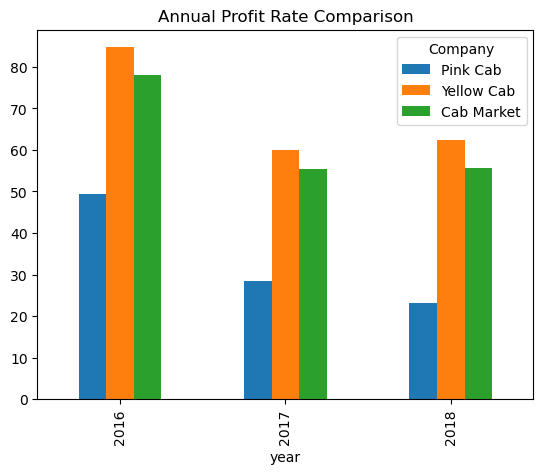

In [28]:
Annual_Profit_Rate = Cab_Data.groupby(['year','Company']).Profit.sum().unstack()/Cab_Data.groupby(['year','Company']).Cost_of_Trip.sum().unstack()*100
Cab_Annual_PR = Cab_Data.groupby(['year']).Profit.sum()/Cab_Data.groupby(['year']).Cost_of_Trip.sum()*100
Annual_Profit_Rate['Cab Market'] = Cab_Annual_PR
print("Annual Profit Rate of Cab Market")
print(Annual_Profit_Rate)
ax = Annual_Profit_Rate.plot(kind='bar',stacked = False, title = 'Annual Profit Rate Comparison')
plt.show()

In [29]:
Cab_DataU = pd.read_csv("/Users/abhilashmeneni/Desktop/Internship/DataSets-main/City.csv")   

In [31]:
frames = [Cab_Data,Cab_DataU ]

In [35]:
Merged_data = pd.concat(frames)
display(Merged_data)

,Transaction ID,Date of Travel,Time of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,...,Age,Income (USD/Month),year,Month,Profit,Profit_Rate,Profit_per_KM,Cost_of_Trip,Population,Users
0,10000011.0,2016-01-08 00:00:00,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290.0,Card,...,28.0,10813.0,2016.0,1.0,57.315,18.274427,1.882266,313.635,NaN,NaN
1,10000012.0,2016-01-09 00:00:00,2016-01-08 01:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703.0,Card,...,27.0,9237.0,2016.0,1.0,23.666,7.067558,0.826904,334.854,NaN,NaN
2,10000013.0,2016-01-10 00:00:00,2016-01-08 02:00:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712.0,Cash,...,53.0,11242.0,2016.0,1.0,27.568,28.236644,3.049558,97.632,NaN,NaN
3,10000014.0,2016-01-11 00:00:00,2016-01-08 03:00:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020.0,Cash,...,23.0,23327.0,2016.0,1.0,25.798,7.337273,0.777751,351.602,NaN,NaN
4,10000015.0,2016-01-12 00:00:00,2016-01-08 04:00:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182.0,Card,...,33.0,8536.0,2016.0,1.0,16.844,17.227131,1.929439,97.776,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,NaN,NaT,NaN,SACRAMENTO CA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"545,776","7,044"
16,NaN,NaN,NaT,NaN,PITTSBURGH PA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"542,085","3,643"
17,NaN,NaN,NaT,NaN,WASHINGTON DC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"418,859","127,001"
18,NaN,NaN,NaT,NaN,NASHVILLE TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"327,225","9,270"


In [36]:
Merged_data.info

<bound method DataFrame.info of     Transaction ID       Date of Travel      Time of Travel   Company  \
0       10000011.0  2016-01-08 00:00:00 2016-01-08 00:00:00  Pink Cab   
1       10000012.0  2016-01-09 00:00:00 2016-01-08 01:00:00  Pink Cab   
2       10000013.0  2016-01-10 00:00:00 2016-01-08 02:00:00  Pink Cab   
3       10000014.0  2016-01-11 00:00:00 2016-01-08 03:00:00  Pink Cab   
4       10000015.0  2016-01-12 00:00:00 2016-01-08 04:00:00  Pink Cab   
..             ...                  ...                 ...       ...   
15             NaN                  NaN                 NaT       NaN   
16             NaN                  NaN                 NaT       NaN   
17             NaN                  NaN                 NaT       NaN   
18             NaN                  NaN                 NaT       NaN   
19             NaN                  NaN                 NaT       NaN   

             City  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
0      ATLANTA

In [38]:
Merged_data.drop(Merged_data[Merged_data.year > 2018].index, inplace=True)

In [41]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17025 entries, 0 to 19
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      17005 non-null  float64       
 1   Date of Travel      17005 non-null  object        
 2   Time of Travel      17005 non-null  datetime64[ns]
 3   Company             17005 non-null  object        
 4   City                17025 non-null  object        
 5   KM Travelled        17005 non-null  float64       
 6   Price Charged       17005 non-null  float64       
 7   Cost of Trip        17005 non-null  float64       
 8   Customer ID         17005 non-null  float64       
 9   Payment_Mode        17005 non-null  object        
 10  Gender              17005 non-null  object        
 11  Age                 17005 non-null  float64       
 12  Income (USD/Month)  17005 non-null  float64       
 13  year                17005 non-null  float64      

In [42]:
Merged_data['year'] = pd.to_numeric(Merged_data['year'], errors='coerce')

In [43]:
Merged_data = Merged_data.dropna(subset=['year'])

In [44]:
Merged_data['year'] = Merged_data['year'].astype(int)

/var/folders/s7/xr843_mn7c5b7tszg1r3njq80000gn/T/ipykernel_855/3027051401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_data['year'] = Merged_data['year'].astype(int)


In [45]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17005 entries, 0 to 26135
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      17005 non-null  float64       
 1   Date of Travel      17005 non-null  object        
 2   Time of Travel      17005 non-null  datetime64[ns]
 3   Company             17005 non-null  object        
 4   City                17005 non-null  object        
 5   KM Travelled        17005 non-null  float64       
 6   Price Charged       17005 non-null  float64       
 7   Cost of Trip        17005 non-null  float64       
 8   Customer ID         17005 non-null  float64       
 9   Payment_Mode        17005 non-null  object        
 10  Gender              17005 non-null  object        
 11  Age                 17005 non-null  float64       
 12  Income (USD/Month)  17005 non-null  float64       
 13  year                17005 non-null  int64     

In [46]:
Merged_data.drop(Merged_data[Merged_data.year > 2018].index, inplace=True)

/var/folders/s7/xr843_mn7c5b7tszg1r3njq80000gn/T/ipykernel_855/3876476134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_data.drop(Merged_data[Merged_data.year > 2018].index, inplace=True)


In [47]:
from sklearn.preprocessing import LabelEncoder
Data = Merged_data.drop(['Transaction ID', 'Customer ID'], axis=1)
le = LabelEncoder()
Data["Gender"] = le.fit_transform(Data["Gender"])
Data["City"] = le.fit_transform(Data["City"])
Data["Payment_Mode"] = le.fit_transform(Data["Payment_Mode"])
Pink_Data = Data[Data['Company'] == 'Pink Cab'] 
Yellow_Data = Data[Data['Company'] == 'Yellow Cab']
Data["Company"] = le.fit_transform(Data["Company"])
Data

,Date of Travel,Time of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),year,Month,Profit,Profit_Rate,Profit_per_KM,Cost_of_Trip,Population,Users
0,2016-01-08 00:00:00,2016-01-08 00:00:00,0,0,30.45,370.95,313.635,0,1,28.0,10813.0,2016,1.0,57.315,18.274427,1.882266,313.635,NaN,NaN
1,2016-01-09 00:00:00,2016-01-08 01:00:00,0,0,28.62,358.52,334.854,0,1,27.0,9237.0,2016,1.0,23.666,7.067558,0.826904,334.854,NaN,NaN
2,2016-01-10 00:00:00,2016-01-08 02:00:00,0,0,9.04,125.20,97.632,1,1,53.0,11242.0,2016,1.0,27.568,28.236644,3.049558,97.632,NaN,NaN
3,2016-01-11 00:00:00,2016-01-08 03:00:00,0,0,33.17,377.40,351.602,1,1,23.0,23327.0,2016,1.0,25.798,7.337273,0.777751,351.602,NaN,NaN
4,2016-01-12 00:00:00,2016-01-08 04:00:00,0,0,8.73,114.62,97.776,0,1,33.0,8536.0,2016,1.0,16.844,17.227131,1.929439,97.776,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26131,2087-07-25 00:00:00,2018-12-31 19:00:00,1,9,34.20,1148.95,430.920,0,1,35.0,16291.0,2018,12.0,718.030,166.627216,20.995029,430.920,NaN,NaN
26132,2087-07-26 00:00:00,2018-12-31 20:00:00,1,9,35.10,999.31,467.532,0,1,30.0,4455.0,2018,12.0,531.778,113.741519,15.150370,467.532,NaN,NaN
26133,2087-07-27 00:00:00,2018-12-31 21:00:00,1,9,10.71,318.64,147.798,1,0,37.0,15749.0,2018,12.0,170.842,115.591551,15.951634,147.798,NaN,NaN
26134,2087-07-28 00:00:00,2018-12-31 22:00:00,1,9,10.35,275.57,140.346,0,1,21.0,31912.0,2018,12.0,135.224,96.350448,13.065121,140.346,NaN,NaN


Text(0, 0.5, 'Yellow Cab')

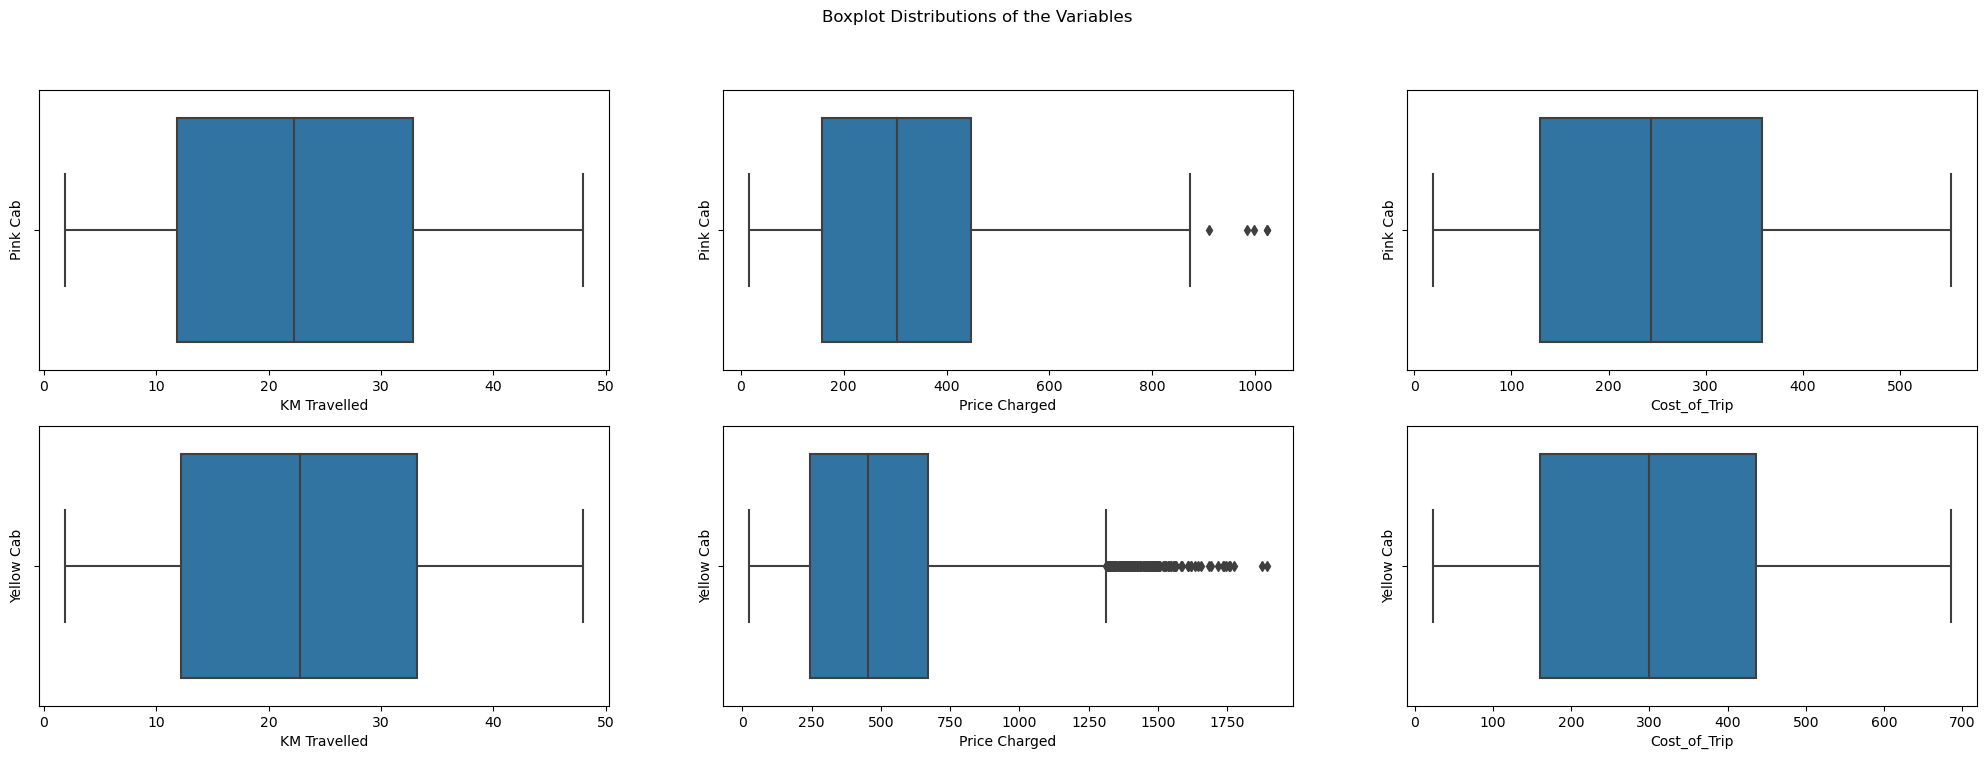

In [48]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM Travelled' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price Charged'   ,     data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM Travelled' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price Charged'   ,     data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=Yellow_Data ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

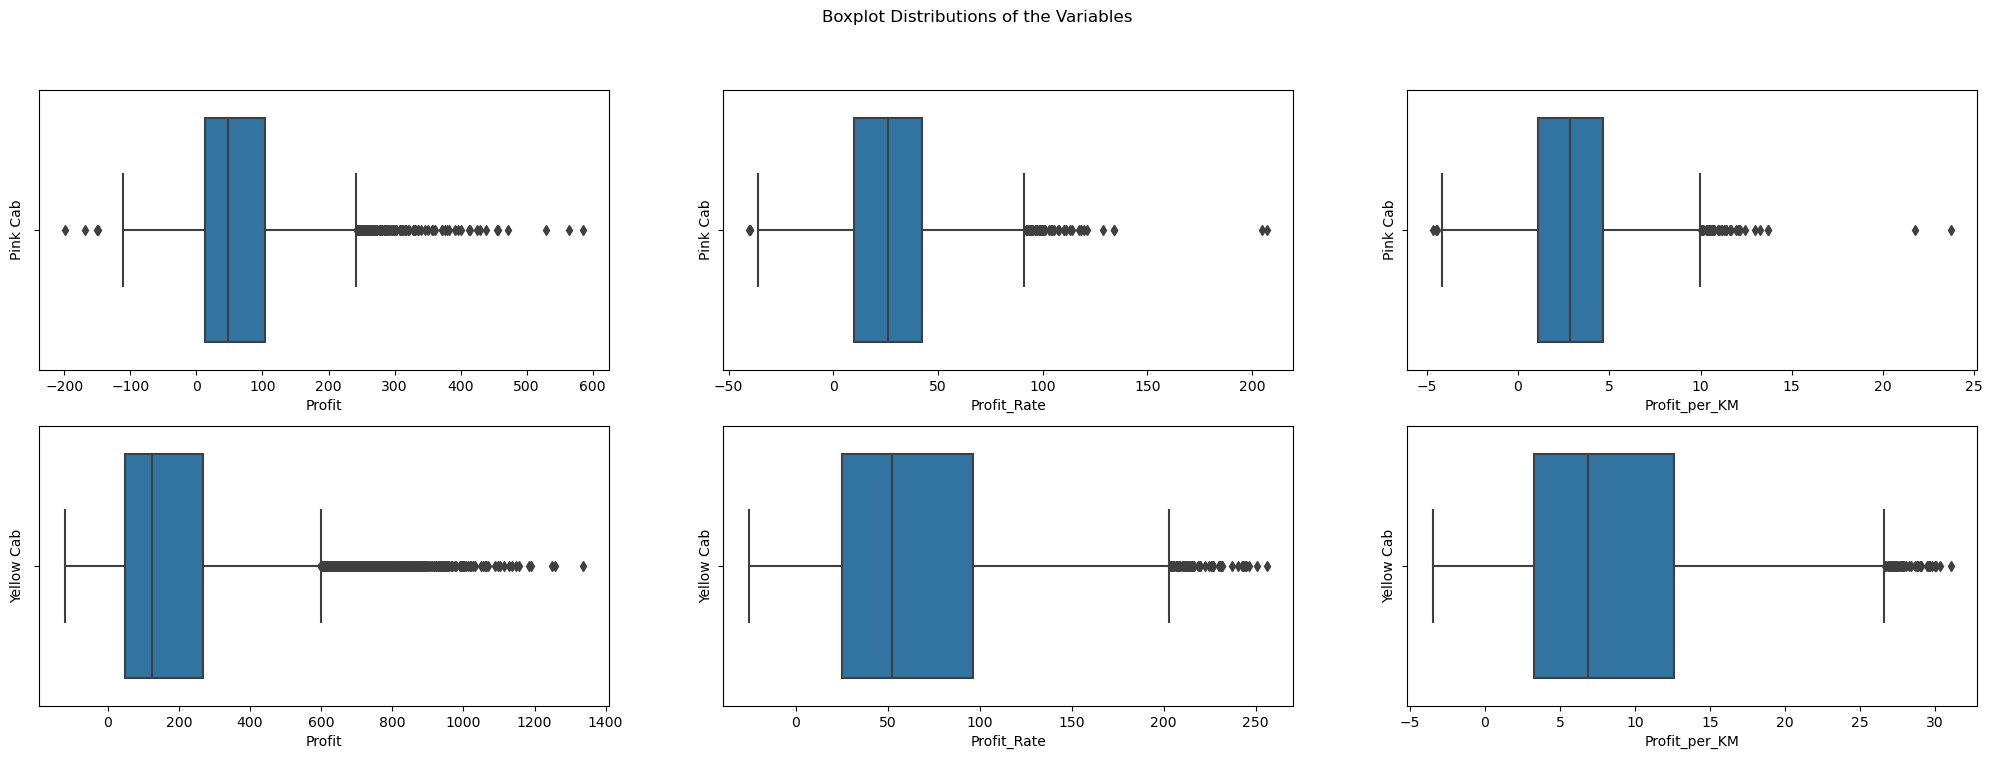

In [49]:
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Profit' ,                 data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Profit_Rate' ,  data=Pink_Data  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Profit_per_KM' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Profit' ,                 data=Yellow_Data ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Profit_Rate' ,  data=Yellow_Data  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Profit_per_KM' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

<AxesSubplot:>

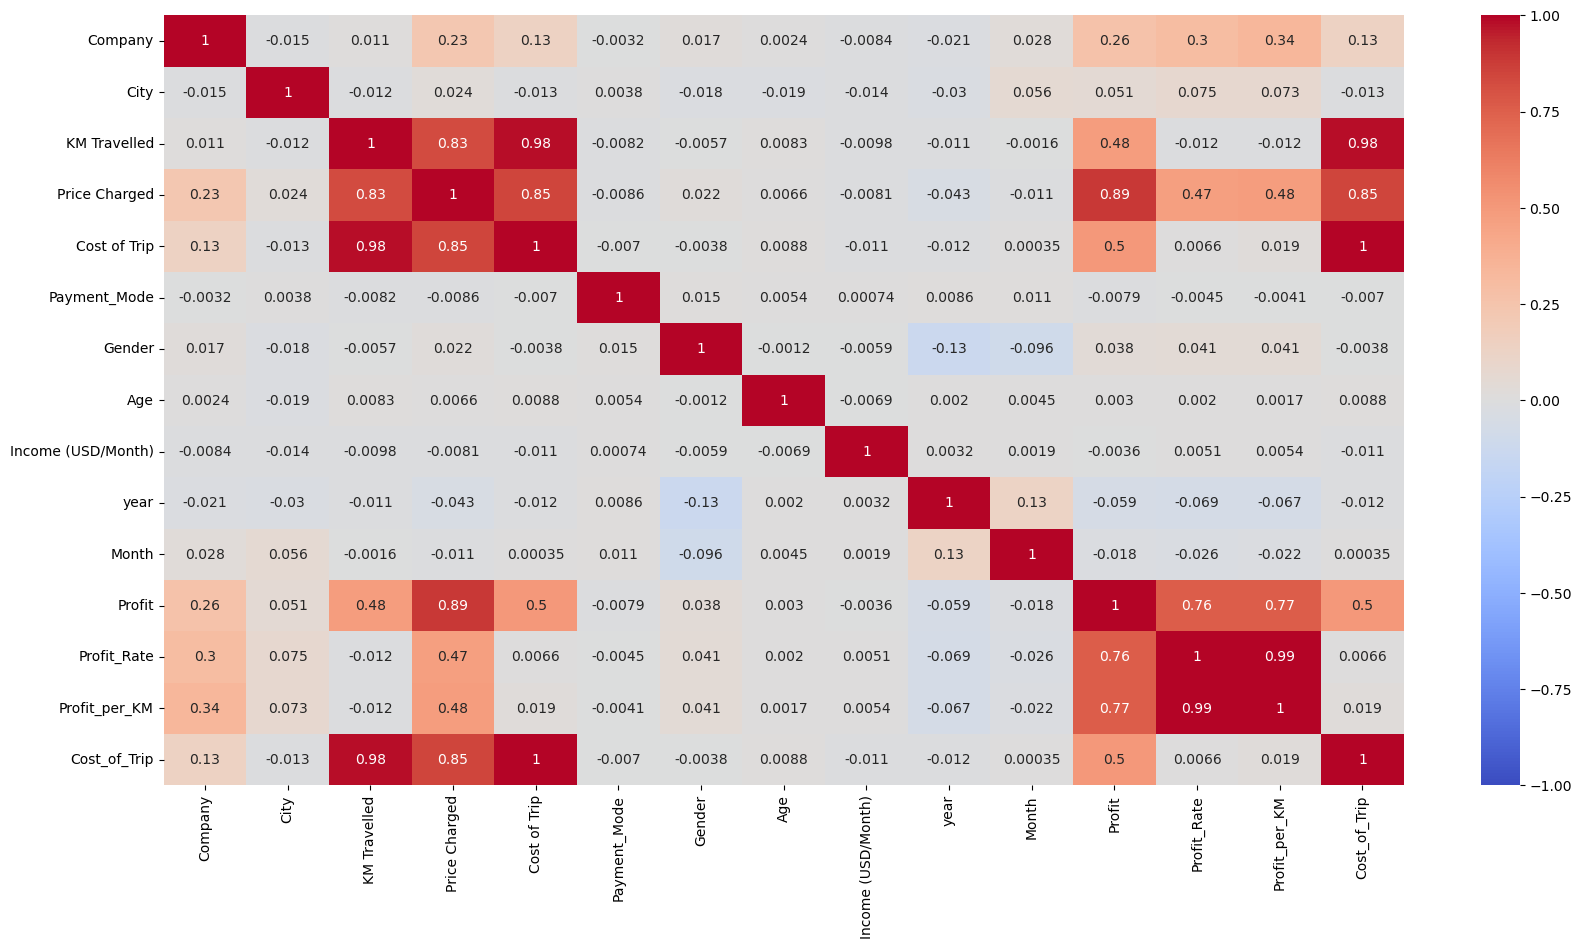

In [51]:
Corr = Data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')